In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from iso639 import languages
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
import requests
import json
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder 
from datetime import datetime
from sklearn.model_selection import cross_validate,cross_val_score,cross_val_predict,train_test_split,GridSearchCV,RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score , mean_squared_error , classification_report ,recall_score , precision_score , ConfusionMatrixDisplay , confusion_matrix
from sklearn.linear_model import Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB
from sklearn.svm import SVC , SVR
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel
%matplotlib inline


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import data
#project 1
raw_data=pd.read_csv('../data/interim/Wholesale_Customers.csv')
df=raw_data.copy()
df.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
161,1,3,12434,540,283,1092,3,2233
124,1,3,36050,1642,2961,4787,500,1621
181,1,3,112151,29627,18148,16745,4948,8550
218,2,1,18,7504,15205,1285,4797,6372
129,1,3,42312,926,1510,1718,410,1819


In [3]:
#cleansing
#investing
df.shape

(440, 8)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
#there is  no object features so no need for describe with object
#df.describe(include='O').T

In [7]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
#check duplicates
df.duplicated().sum()

0

In [10]:
#check missing value
#there is no missing value
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
#check columns
#rename columns
df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
df.columns

Index(['channel', 'region', 'fresh', 'milk', 'grocery', 'frozen',
       'detergents_paper', 'delicassen'],
      dtype='object')

In [12]:
#there is  no object features so no need for check unique ids for object 
#check rows 
#check unique id and logic
#check object
#no object features exist
for i in  df.select_dtypes('object'):
    print(f'for {i} : \n',df[i].value_counts())
    print('-'*60)

In [13]:
#feature engineering
#there is no domain knowledge feature,string operation,data and time feature ,web users nor geospatial feature

In [16]:
#univariate analysis
for i in df.columns :
    print(f'for {i} : ',df[i].nunique())

for channel :  2
for region :  3
for fresh :  433
for milk :  421
for grocery :  430
for frozen :  426
for detergents_paper :  417
for delicassen :  403


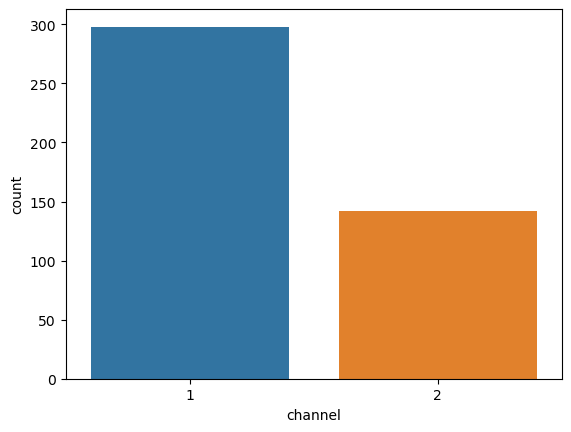

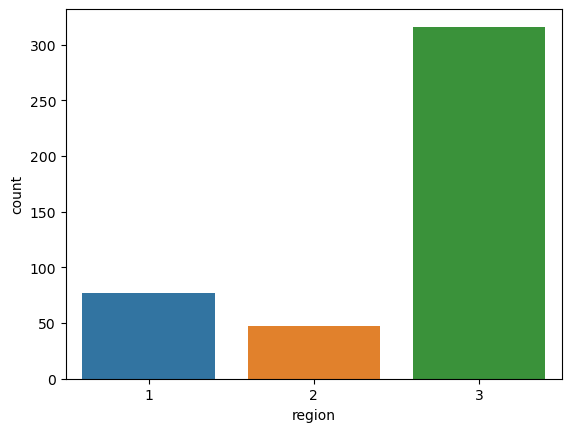

<Figure size 640x480 with 0 Axes>

In [18]:
#the first two columns have 2 and 3 ids so no need for histplot just count plot
for i in df.columns[:2]:
    sns.countplot(x=df[i])
    plt.figure()

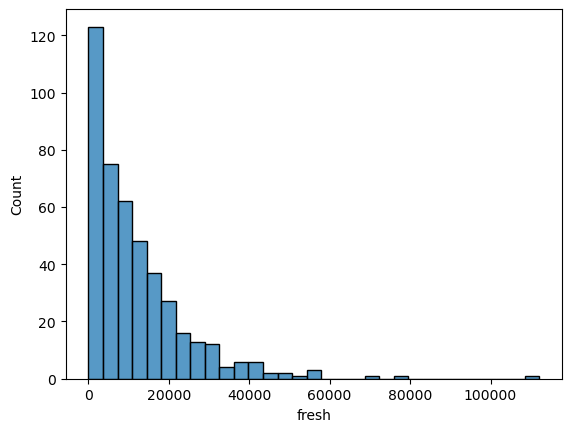

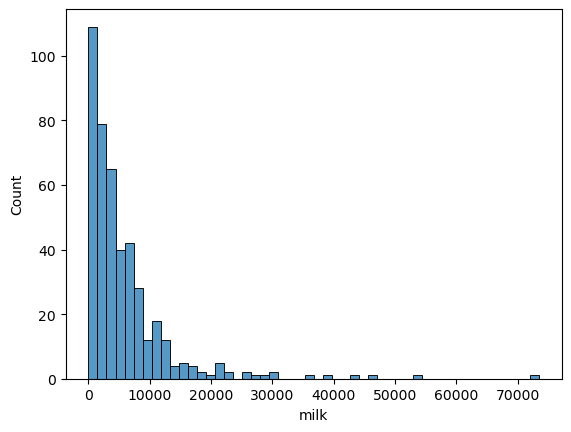

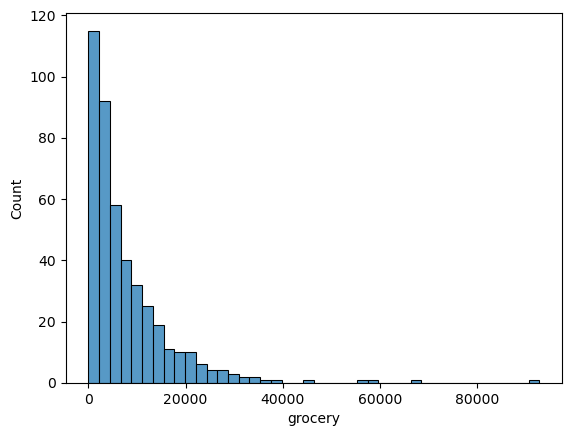

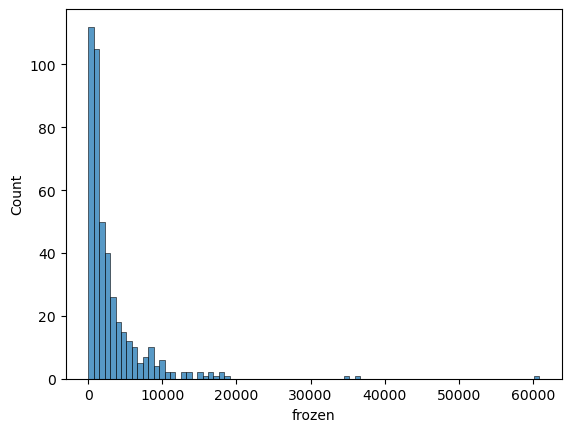

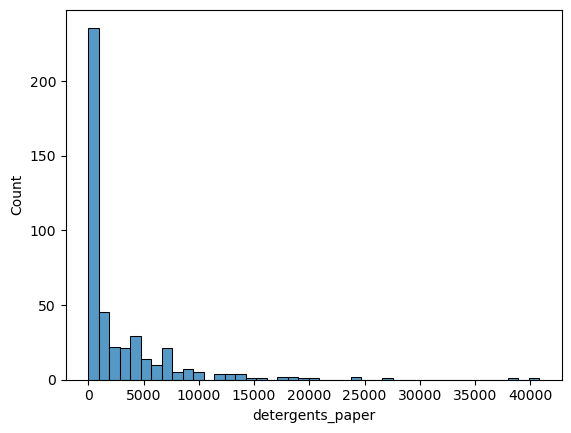

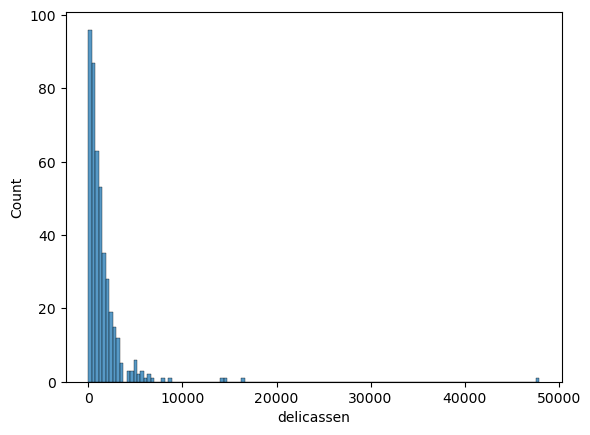

<Figure size 640x480 with 0 Axes>

In [19]:
#the rest of numerical column have more than 3 ids so we can use like usual ---> histplot
for i in df.columns[2:]:
    sns.histplot(x=df[i])
    plt.figure()

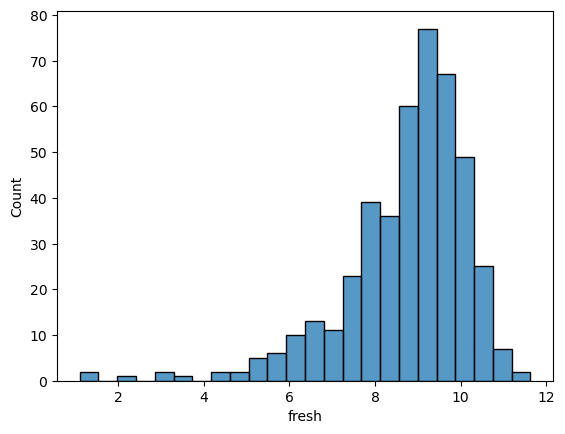

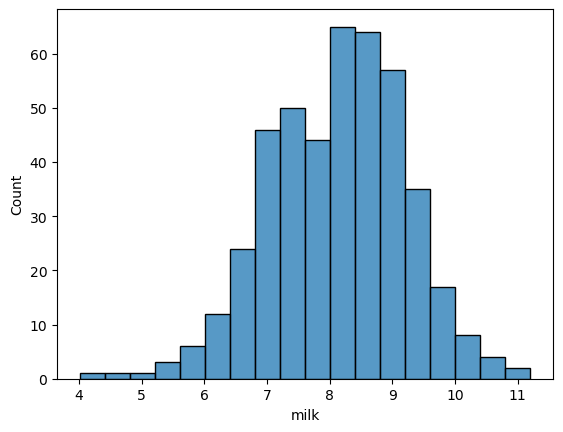

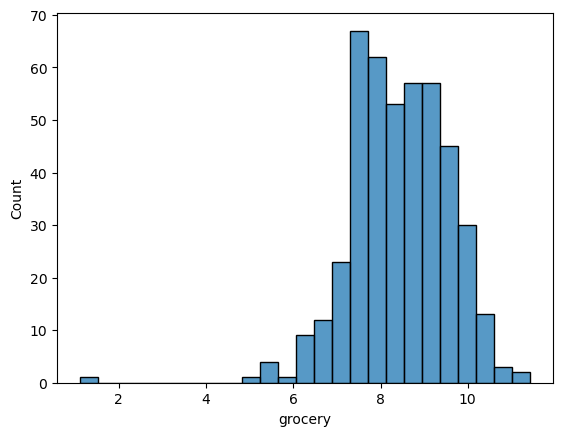

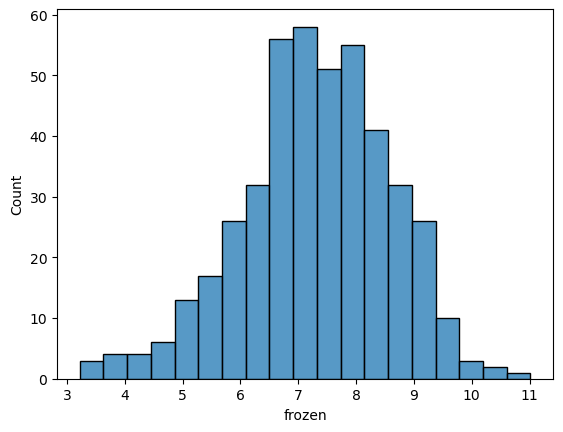

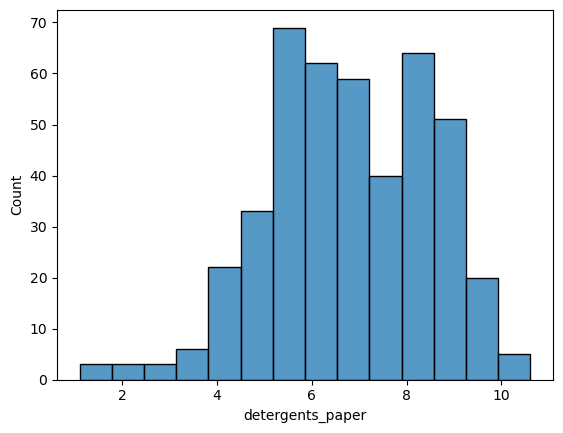

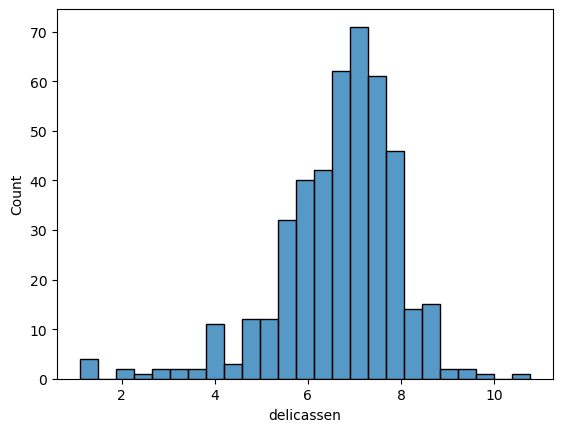

<Figure size 640x480 with 0 Axes>

In [20]:
#beacuse of the data is skewing we need to log it
#the rest of numerical column have more than 3 ids so we can use like usual ---> histplot
for i in df.columns[2:]:
    sns.histplot(x=np.log(df[i]))
    plt.figure()

In [14]:
#detec and handle outliers
#there is no outliers to be handled because it is segmentation and we need all of rows

<AxesSubplot:>

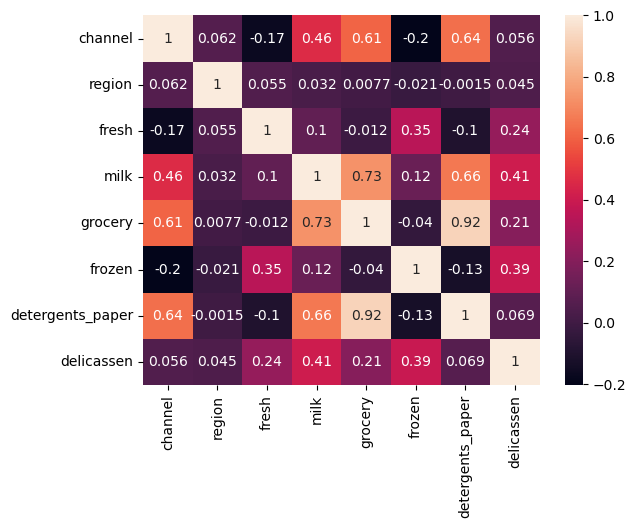

In [15]:
#correlation
sns.heatmap(df.select_dtypes('number').corr(), annot=True )

In [21]:
#no need for encoding beacuse there are no object features
lst_obj=[]
for i in df.select_dtypes(include="O"):
    lst_obj.append(df[i])
if len(lst_obj)==0:
    print('there is no categorical columns left')
else :
    print('there is categorical columns left')

there is no categorical columns left


In [22]:
#no need for splitting because we use clusterig

In [24]:
#apply elbow method
#fitting
inertia_lst = []
for k in range(3 , 15):
    
    pipline = make_pipeline(StandardScaler() , KMeans(n_clusters=k))
    
    pipline.fit(df)
    
    inertia_lst.append(pipline['kmeans'].inertia_)
    
    


In [25]:
inertia_lst

[2149.283956221759,
 1851.8408722743848,
 1564.277058371762,
 1315.609424493192,
 1173.7285957651095,
 1065.8347974718051,
 980.1550518139488,
 912.262792595456,
 851.7840406415776,
 791.3617358445517,
 765.0960066555456,
 750.1505496653091]

<AxesSubplot:>

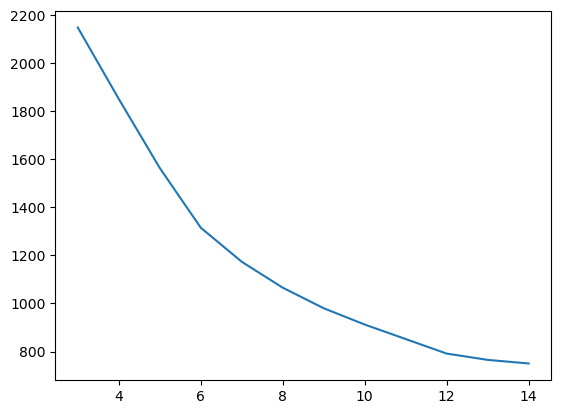

In [26]:
#plot interia vs range of k means
sns.lineplot(x = range(3 , 15) , y = inertia_lst)

In [32]:
#we choose 6 and 8 for clustering
#fit again then predict
#create pipeline with scaling then preferred k with k means
lst=[6,8]
for i in lst :
    pipline = make_pipeline(StandardScaler() , KMeans(n_clusters=i))
    pipline.fit(df)
    df[f'clusters_{i}']=pipline.predict(df)
    n_unique=df[f'clusters_{i}'].nunique()
    print(f'for {i} clusters : ')
    print(n_unique)
    group=df.groupby([f'clusters_{i}']).agg(['mean' , 'min'])
    print(group)

for 6 clusters : 
6
             channel        region             fresh                 milk  \
                mean min      mean min          mean    min          mean   
clusters_6                                                                  
0           1.000000   1  3.000000   3   9263.787709      3   2994.860335   
1           1.057471   1  1.321839   1  10590.045977      3   3182.540230   
2           2.000000   2  2.775510   1   8269.969388     18   7533.816327   
3           2.000000   2  2.351351   1   8636.459459     85  20418.027027   
4           1.052632   1  2.763158   1  40361.210526  11314   5254.342105   
5           1.000000   1  3.000000   3  36847.000000  36847  43950.000000   

                        grocery               frozen        detergents_paper  \
              min          mean    min          mean    min             mean   
clusters_6                                                                     
0              55   3430.547486      3   2668.

In [31]:
df

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,clusters_6,clusters_8
0,2,3,12669,9656,7561,214,2674,1338,2,1
1,2,3,7057,9810,9568,1762,3293,1776,2,1
2,2,3,6353,8808,7684,2405,3516,7844,2,1
3,1,3,13265,1196,4221,6404,507,1788,0,0
4,2,3,22615,5410,7198,3915,1777,5185,2,1
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,4,6
436,1,3,39228,1431,764,4510,93,2346,4,6
437,2,3,14531,15488,30243,437,14841,1867,2,7
438,1,3,10290,1981,2232,1038,168,2125,0,0


In [33]:
#analytics
#frozen column with cluster 0 of cluster_6
#create mask
cluster0 = df[df['clusters_6'] == 0]

<AxesSubplot:xlabel='frozen', ylabel='Count'>

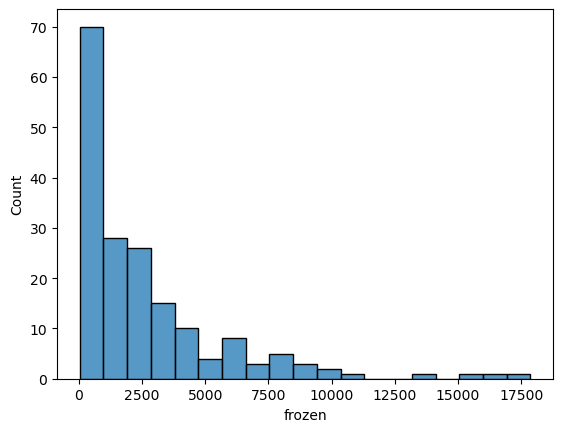

In [35]:
sns.histplot(x = cluster0['frozen'])
#no skewing about data

<AxesSubplot:xlabel='frozen'>

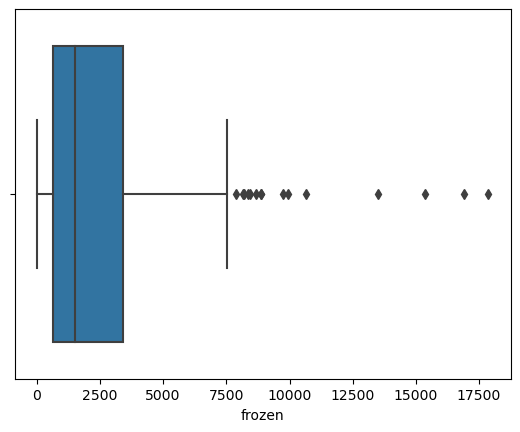

In [36]:
sns.boxplot(x = cluster0['frozen'])

<AxesSubplot:xlabel='frozen'>

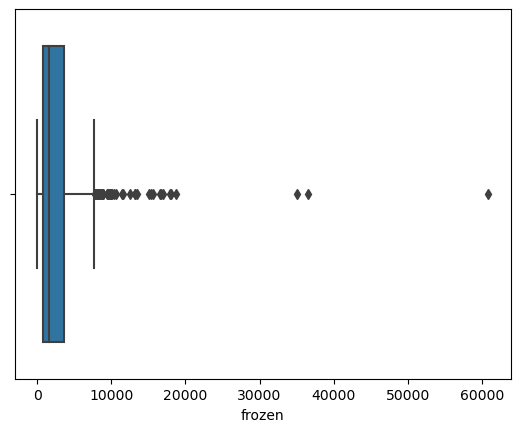

In [37]:
sns.boxplot(df['frozen'])